#1. Mount Drive

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
!ls -al '/gdrive/My Drive/data'

total 2193336
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,906 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='NanumBarunGothic') 

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [5]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. 집계시

In [7]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [8]:
# Create data_06_22 Dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [9]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [10]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [11]:
data_06_22_counting_sorted = data_06_22_counting.sort_index()

In [12]:
data_06_22_counting_sorted

6     1440
7     1585
8     1662
9     1703
10    1725
11    1744
12    1758
13    1754
14    1766
15    1755
16    1724
17    1719
18    1666
19    1628
20    1611
21    1559
22    1505
Name: 집계시, dtype: int64

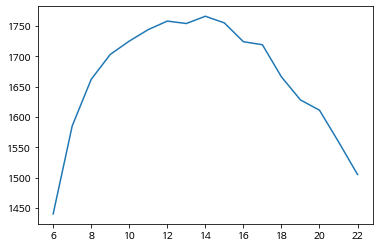

In [13]:
plt.plot(data_06_22_counting_sorted.index, data_06_22_counting_sorted.values)

In [14]:
# Store index of data_06_22_counting into x
x = data_06_22_counting_sorted.index

In [15]:
labels = [str(i)+'시' for i in x]

In [16]:
labels

['6시',
 '7시',
 '8시',
 '9시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시']

In [17]:
# Store values of data_06_22_counting into values
values = data_06_22_counting_sorted.values

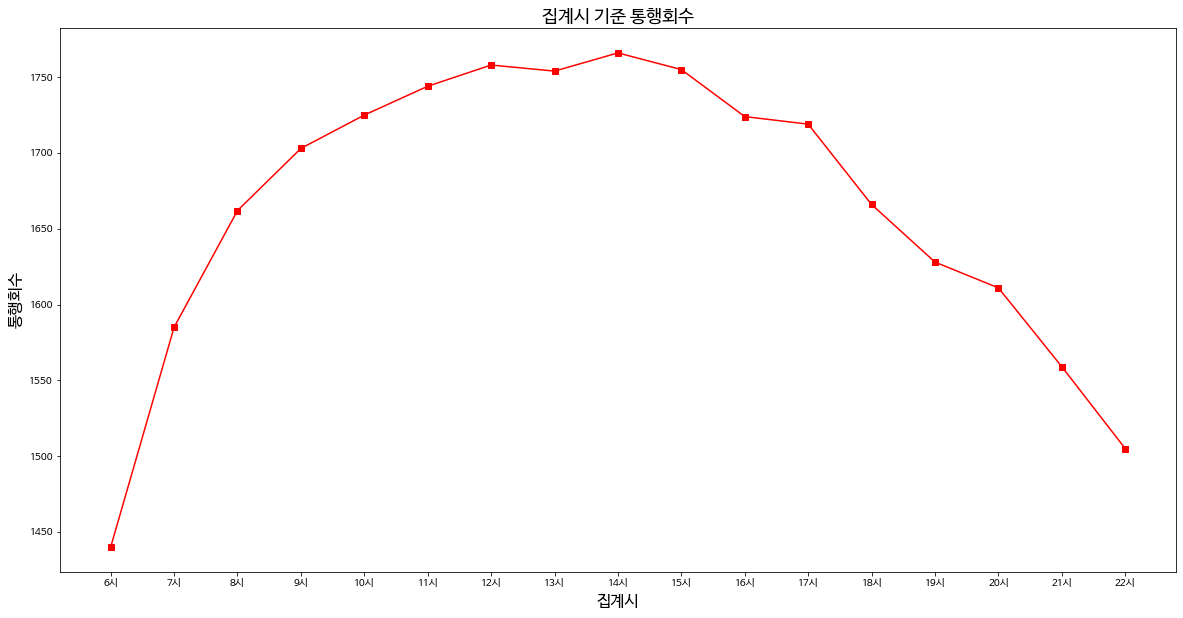

In [19]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae Line Chart
plt.plot(labels, values, marker='s', color='r')
# Generate labels and title
plt.title("집계시 기준 통행회수",fontsize=18)
plt.xlabel('집계시', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#5. 도착영업소코드

In [20]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [21]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [22]:
data_destination_counting_sorted = data_destination_counting.sort_index()

In [23]:
data_destination_counting_sorted

105    12274
110     9419
115     6509
120     1511
125     1677
130     1972
135     1759
140     2235
Name: 도착영업소코드, dtype: int64

In [24]:
# Store index of data_destination_counting into x
x = data_destination_counting_sorted.index

In [25]:
labels = [str(i) for i in x]

In [26]:
labels

['105', '110', '115', '120', '125', '130', '135', '140']

In [28]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥', '목천', '대전', '황간', '남구미', '동김천', '경주', '부산']

In [29]:
# Store values of data_destination_counting into values
values = data_destination_counting_sorted.values

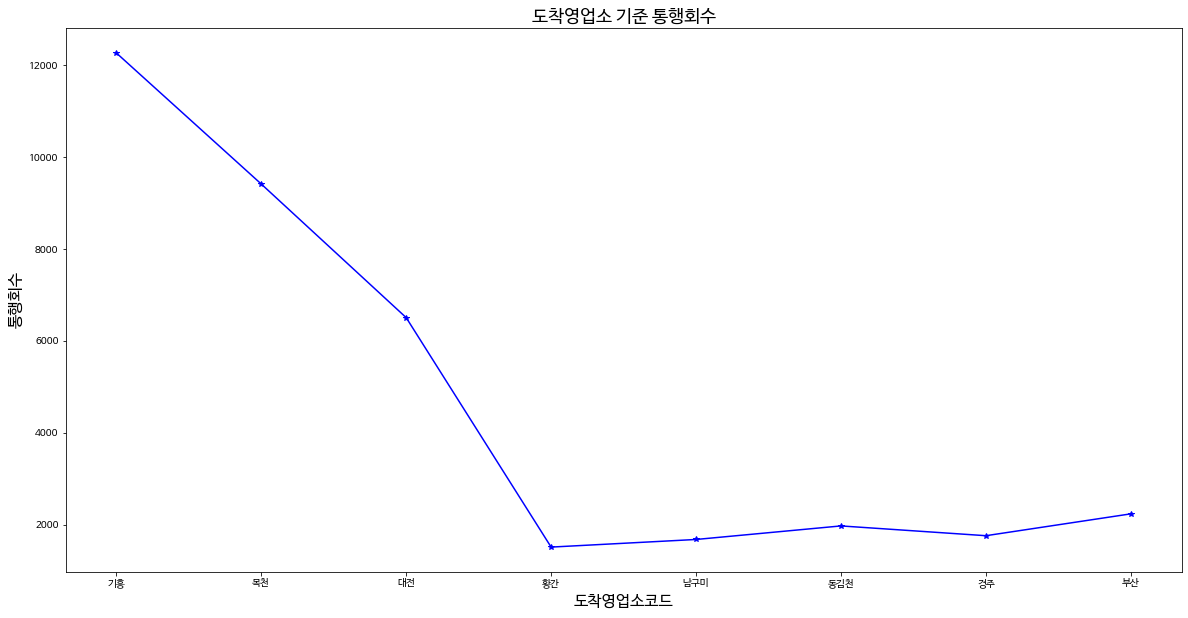

In [30]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae Line Chart
plt.plot(labels, values, marker='*', color='b')
# Generate labels and title
plt.title("도착영업소 기준 통행회수",fontsize=18)
plt.xlabel('도착영업소코드', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#6. 요일

In [31]:
data_weekdays = data.groupby(by=['요일']).mean()

In [32]:
data_weekdays

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간
요일,,,,,
0,2.020022e+07,11.734950,101.0,114.529922,4813.112783
1,2.020022e+07,11.691664,101.0,113.743022,4612.857648
2,2.020021e+07,11.902394,101.0,113.841621,4774.242357
3,2.020021e+07,11.929709,101.0,114.103057,4918.862530
4,2.020021e+07,11.923865,101.0,114.440886,5264.959004
5,2.020022e+07,11.463546,101.0,114.764006,5137.932272
6,2.020022e+07,12.400000,101.0,115.002099,4823.627282


In [33]:
data_weekdays_time = data_weekdays['통행시간']

In [34]:
data_weekdays_time

요일
0    4813.112783
1    4612.857648
2    4774.242357
3    4918.862530
4    5264.959004
5    5137.932272
6    4823.627282
Name: 통행시간, dtype: float64

In [35]:
x = data_weekdays_time.index

In [36]:
x

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='요일')

In [37]:
labels = ['월', '화', '수', '목', '금', '토', '일']

In [38]:
values = data_weekdays_time.values

In [39]:
values

array([4813.11278329, 4612.85764793, 4774.24235727, 4918.86252975,
       5264.95900439, 5137.93227168, 4823.62728227])

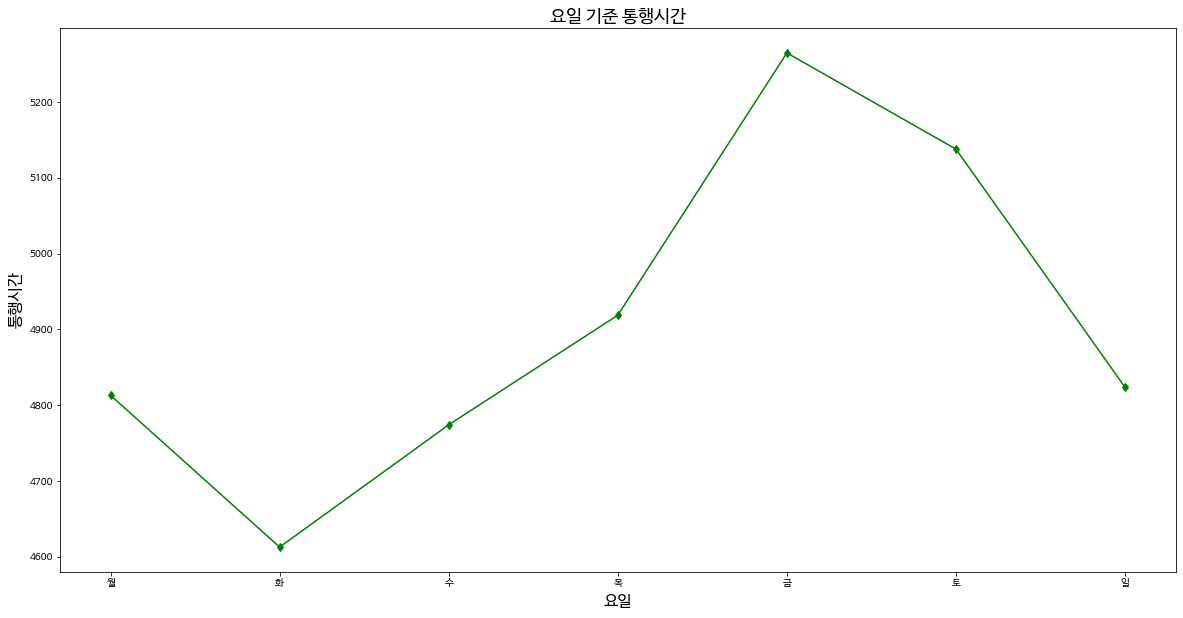

In [40]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae pie Chart
plt.plot(labels, values, marker='d', color='g')
# Generate labels and title
plt.title("요일 기준 통행시간",fontsize=18)
plt.xlabel('요일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()